## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.



1.  Regression is for numerical quantities and predictions while classification is for categorical and qualitative predictions. They're also imported differently when using packages, like sklearn's KNeighborsRegressor v. KNeighborsClassifier
2. A confusion table is a cross-tabulation of prediction v. actual values used for classification. It can be called with pd.crosstab(). It helps look for patterns and errors between categorical variables, and if the model predicts the categorical value correctly.
3. SSE quantifies the accuracy of a particular model, comparing the distance between values v. the predicted values by subtracting the 2 values and squaring it to negate the negative. The bigger the SSE is, the further away the predicted point is from the actual.
4. Overfitting v. underfitting refers to the model performance. Overfitting means the model performs well with the training data it's trained from, but it doesn't perform well when testing it on other datasets. Underfitting is the opposite. It fails to capture patterns in a dataset, resulting in poor performance on both the test dataset and the training dataset.
5. Splitting the data into training and testing maintains the same way the data was gathered overall while still allowing for differences to check a model's performance under real-world data, like seeing how well it works for smaller datasets. Choosing k by evaluating accuracy or SSE at different levels on the test set will give different levels of accuracy and the opportunity to choose the best-performing one.
6. Class label prediction is when the model outputs a specific answer to the output, like "positive" or "negative" to a COVID test given the symptoms. It's useful when a clear specific output is needed given the inputs or constraints. It's simplicity in giving a straight answer helps with faster decision makings. However a disadvantage is that it lacks giving information on other possibilities and can't inform on accuracy well. A probability distribution gives the probability for all possible class labels. It's best for getting a good overview of the whole model and its predictions, and better for overall uncertainty, like predicting how well a new vaccine will work or how much customers would want a certain product. It gives more flexibility in the possibilities for decision-making. However, it can be more difficult to understand by giving all the information at an overwhelming manner.



**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/jac7az/knn/refs/heads/main/data/USA_cars_datasets.csv'
car=pd.read_csv(url)

In [41]:
car=car[['price','year','mileage']]
print(car.shape)
print(car['price'].unique(),car['year'].unique(),car['mileage'].unique)
car.describe()
#No NAs. dimensions are 2499 x 3.

(2499, 3)
[ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55000 16200 19000  5580 54000 16000 27000  7760 19600 20000
 18100 23000 13490 17800  6650 29100 21100 18600  4340 19300 12780 15800
 29400  4430 19400 15900 26400  4140 18300 17900  4640 24000 13200 18000
 14900 11500  9110  7350 24500  9300 39800 53500 15110 34000 26502  5990
 13600 23605 10780 13800 25201  7070  8700 18003  8530 23100 17000 34002
  6980 20802  9200 26500 24802 28500 47500 23500 23505 10940 32100 53000
  6830 26414  4160 19405  5690 25900 24005  5090 19500 32012  6800  4260
     0 31802  7210 28402 33300  6700  6440 19900 37000  4040 22300 31200
  4290 22800 19002 39000  6060 28800 40000  6140 21000 20105  6760 25800
  5470 24502  7900 27305 15290 25502  3800  1400 18402   175 24503 15840
 20500 21003  4200 17400 32001 15700 3100

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [72]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w
Y=car['price']
Y=Y.to_numpy()
X=car.loc[:,['mileage','year']]
X=X.apply(maxmin)
train,test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=145)

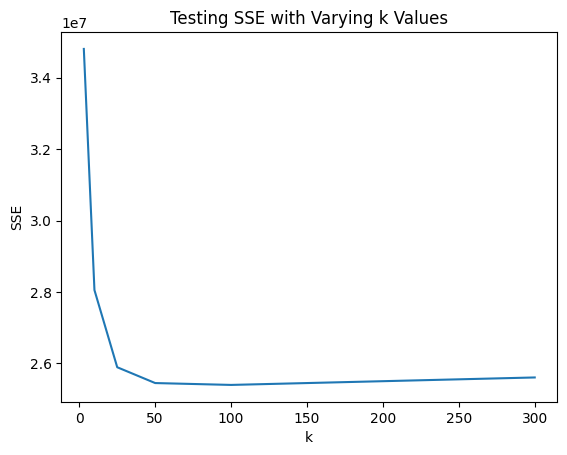

In [86]:
degrees=[3,10,25,50,100,300]
SSE=[]
for k in degrees:
  model=KNeighborsRegressor(n_neighbors=k)
  fit=model.fit(train,y_train)
  y_hat=fit.predict(test)
  SSE.append(np.sum((y_test-y_hat)**2/len(y_train)))
SSE
plt.plot(degrees,SSE,label="Training SSE")
plt.title("Testing SSE with Varying k Values")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

#As k increases, the SSE drops until the model doesn't improve significantly with
  #more k values, in which it slowly starts to increase again.

#The best k value is 25.

#At first

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.